# Assessing & Exploring 
Use [README file](http://www.fueleconomy.gov/feg/epadata/Readme.txt) or [This pdf](http://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf) to know more abou the datasets and columns\
Explore `all_alpha_08.csv` and `all_alpha_18.csv` and the questions below.

In [ ]:
# 1- number of samples in each dataset? #2404
# 2- number of columns in each dataset? #18
# 3- duplicate rows in each dataset? 
# 4- number of features with missing values in both datasets?
# 5- datatypes of columns in each dataset ?
# 6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
#     Air Pollution Score      Greenhouse Gas Score  Cyl
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)?
# 8- how is the column "cyl" different in both datasets? (checkbox)
#                  Answer- Datatype 
# 9- What are the types of fuel present in each dataset ?
# 10- What are the fuel types that exist in a dataset and not the other? 

In [ ]:
# import
import pandas as pd

df_8 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')


In [ ]:
# 1- number of samples and columns in each dataset? 
print(df_8.shape[0])
print(df_8.shape[0])
print(df_8.shape[1])
print(df_8.shape[1])


In [ ]:
# 3- duplicate rows in each dataset?
print(sum(df_8.duplicated()))
print(sum(df_18.duplicated()))


In [ ]:
# 4- number of features with missing values in 2008?
print(df_8.nunique())

In [ ]:
# 4- number of features with missing values in 2018?
print(df_18.nunique())


In [ ]:
# 5- datatypes of columns in each dataset ?
print(df_18.dtypes)
print(df_8.dtypes)

In [ ]:
#6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
#       Air Pollution Score      Greenhouse Gas Score  Cyl

In [ ]:
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)
print(df_8.isnull().sum())
print(df_18.isnull().sum())


In [ ]:
# 8- how is the column "Cyl" different in both datasets?
print(type(df_8['Cyl'][0]))
print(type(df_18['Cyl'][0]))

In [ ]:
# 9- What are the types of fuel present in each dataset ?
print(type(df_8['Fuel'][0]))
print(type(df_18['Fuel'][0]))

In [ ]:
# 10- What are the types of fuel present in each dataset ?
print(df_18.Fuel.unique())
print(df_8.Fuel.unique())

# Cleaning

## Cleaning - Column Labels

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.

Columns to Drop:\
From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'\
From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

In [ ]:
# drop the columns from 2008
df_8.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1,
          inplace=True)
df_8.head(1)

In [ ]:
# drop the columns from 2018
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1,
inplace=True)
df_18.head(1)

## Cleaning -  Rename Columns
**Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.**\
**Rename all column labels to replace spaces with underscores and convert everything to lowercase.**\
(Underscores can be much easier to work with in Python than spaces.\
For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query().\
Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [ ]:
# rename the column
df_8.rename(columns={'Sales Area':'Cert Region'}, inplace=True)

In [ ]:
# fix columns in both datasets
df_8.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_8.head()

In [ ]:
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

df_18.head()

In [ ]:
# confirm that both datasets share the exact column names:
df_8.columns == df_18.columns
(df_8.columns == df_18.columns).all()

In [ ]:
# save the new datasets as "data_08_v1.csv" and 'data_18_v1.csv'.
df_8.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

## Cleaning - Filter, Drop Nulls, Dedupe
For consistency, only compare cars certified by California standards.\
Filter both datasets using query to select only rows where "cert_region" is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

Use `data_08_v1.csv` and `data_18_v1.csv` that you just saved


### Filter by Certification Region

In [ ]:
# filter datasets for rows following California standards using query
df_8 = df_8.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [ ]:
# confirm only certification region is California
df_8['cert_region'].unique()
df_18['cert_region'].unique()

In [ ]:
# drop certification region columns form both datasets
df_8.drop(['cert_region'], axis=1, inplace=True)
df_18.drop(['cert_region'], axis=1, inplace=True)

### Drop Rows with Missing Values

In [ ]:
# drop rows with any null values in both datasets
df_8.dropna(inplace=True)
df_18.dropna(inplace=True)

In [ ]:
# checks if any of the columns have null values
print(df_8.isnull().sum().any())
print(df_18.isnull().sum().any())

### Dedupe Data

In [ ]:
# print number of duplicates in 2008 and 2018 datasets
print(sum(df_8.duplicated()))
print(sum(df_18.duplicated()))

In [ ]:
# drop duplicates in both datasets
df_8.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [ ]:
# confirm your changes
print(df_8.duplicated().sum())
print(df_18.duplicated().sum())

In [ ]:
# check the shape of each dataset -- if the 2008 size isn't (986,13) and 2018 (794,13), you should probably cry.
df_8.info ###now i cry but no time :( 
df_18.info ###after some cry it works :)

In [ ]:
# make a checkpoint in case you mess up anything later
df_8.to_csv('data_8.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

## Cleaning - Fixing Data Types


### Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [ ]:
# extract int from string in cyl in the 2008 dataset
df_8['cyl'] = df_8['cyl'].str.extract('(\d+)').astype(int)

In [ ]:
# convert the data type of the "cyl" column in the 2018 dataset from float to int 
df_18['cyl'] = df_18['cyl'].astype(int)

In [ ]:
# verify that the data type of the column in both datasets is "int"
print(type(df_8['cyl'][0]))
print(type(df_18['cyl'][1]))


### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [ ]:
# try to change the data type to float
df_8.air_pollution_score = df_8.air_pollution_score.astype(float)


In [ ]:
# you should have faced an error, get the row that caused that error
## there is error with the value 6/4##
error_position = df_8.query('air_pollution_score == "6/4"')
print(error_position)

# It's not just the air pollution score!
The cars that have more than one type of fuel in a single row are hybrid (run on more than one type of fuel)! Multiple columns will be affected too!\
    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."\
This is why you can see that multiple columns contain more than one value


In [ ]:
# You have two options here: (1) Split the row by "/" into two rows, (2) just drop the rows that contain the ("/") in any of the columns
# You will lose a point for each dataset if you go with the second option

In [ ]:
# to split the rows---->
# 1- get the rows that contain / in the fuel column
hb_8 = df_8[df_8['fuel'].str.contains('/')]
hb_18 = df_18[df_18['fuel'].str.contains('/')]
# 2- make two copies of these rows
df1 = hb_8.copy()
df2 = hb_8.copy()
# 3- get a list of all columns that are affected (you can get them by looking at any row of the hybrid cars)
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
# 4- split the the row by / to two rows (one for each copy) for EACH COLUMN --> first copy should store the value before the / and the second one should store the one after the /  
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
new_rows = pd.concat([df1,df2])
# 5- drop the original row from the dataset
df_8.drop(hb_8.index, inplace=True)
# 6- append the newely created rows to the original dataframe
df_8 = pd.concat([df_8,new_rows], ignore_index=True)
# 7- repeat the process for each dataset (the list of columns will change in the 2018 set)
df1 = hb_18.copy()
df2 = hb_18.copy()

This is the row before splitting\
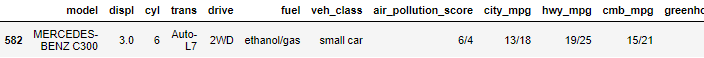

This what it should look like after splitting\
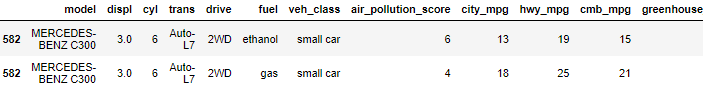

In [ ]:
# check that there are no hybrid cars in the 2008 dataset anymore:
df_8[df_8['fuel'].str.contains('/')]

### Repeat this process for the 2018 dataset

In [ ]:
# do whatever you did in the previous cells
df1 = hb_8.copy()
df2 = hb_8.copy()
# 3- get a list of all columns that are affected (you can get them by looking at any row of the hybrid cars)
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
# 4- split the the row by / to two rows (one for each copy) for EACH COLUMN --> first copy should store the value before the / and the second one should store the one after the /  
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
new_rows = pd.concat([df1,df2])
# 5- drop the original row from the dataset
df_18.drop(hb_18.index, inplace=True)
# 6- append the newely created rows to the original dataframe
df_18 = pd.concat([df_18,new_rows], ignore_index=True)
# 7- repeat the process for each dataset (the list of columns will change in the 2018 set)
df1 = hb_18.copy()
df2 = hb_18.copy()

In [ ]:
# now, try to change the data type again

# for 2008, convert string to float
df_8.air_pollution_score = df_8.air_pollution_score.astype(float)
# for 2018, convert int to float
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)


## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [ ]:
# check the data type of the columns
print(df_8.dtypes)
print(df_18.dtypes)

In [ ]:
# convert to float
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_8[c] = df_8[c].astype(float)

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [ ]:
# convert the data type from float to int in the 2008 dataset
df_8['greenhouse_gas_score'] = df_8['greenhouse_gas_score'].astype(int)
df_18['greenhouse_gas_score'] = df_18['greenhouse_gas_score'].astype(int)

In [ ]:
#### check that all columns and their data type in the 2008 dataset matches excatly the ones in the 2018 dataset
#### all columns MUST be the same data type
df_8.dtypes == df_18.dtypes

In [ ]:
# check the shape of both datasets
df_8.shape == df_18.shape

In [ ]:
# Save your final CLEAN datasets as "clean_08.csv" and "clean_18.csv"
df_8.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)